In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm, animation
from IPython.display import HTML

## 1. SN Class

model -

$$ y = \frac{1}{1+exp^{-(wx + b)}} \space [where\space y = 0,1]$$

In [ ]:
# training data
X = np.array([0.5,2.5])
Y = np.array([0.2,0.9])

In [ ]:
class SN:

  def __init__(self,w_int,b_int):
    self.w = w_int
    self.b = b_int
    self.w_h = []  # histories for weights
    self.b_h = []  # histories for bias term
    self.error_h = None # histories for errors

  def sigmoid(self,x):
    return 1/(1+np.exp(-x))

  def model(self, x):
    return self.sigmoid(self.w*x+self.b)

  def grad_w(self,x,y):
    y_pred = self.model(x)
    return (y_pred-y)*(y_pred)*(1-y_pred)*x

  def grad_b(self,x,y):
    y_pred = self.model(x)
    return (y_pred-y)*(y_pred)*(1-y_pred)

  def error(self,X,Y,W=None,B=None):
    if W is None:
      W = self.w

    if B is None:
      B = self.b

    err = 0
    m = len(X)
    for x,y in zip(X,Y):
      model = 1/(1+np.exp(-(W*x+B)))
      err += np.square((model-y))
    return err/m

  def fit(self,X,Y,epochs=1,learning_rate=1,display_loss=True):

    if display_loss:
      self.error_h = {}


    m = len(X)
    for i in range(epochs):
      dw,db = 0,0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)

      self.w -= learning_rate*dw/m
      self.b -= learning_rate*db/m
      self.append_log()

      if display_loss:
        Y_pred = self.model(X)
        self.error_h[i] = self.error(X,Y)


    if display_loss:
      plt.plot(self.error_h.keys(),self.error_h.values())
      plt.show()


  def append_log(self):
    self.w_h.append(self.w)
    self.b_h.append(self.b)


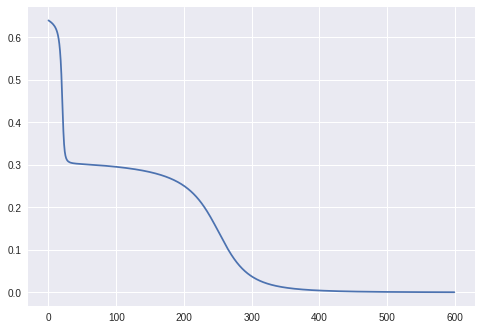

In [ ]:
epochs = 600
sn = SN(-3,4)
sn.fit(X,Y,epochs=epochs,learning_rate=1,display_loss=True)

## 2. Plotting 2D contour Plot

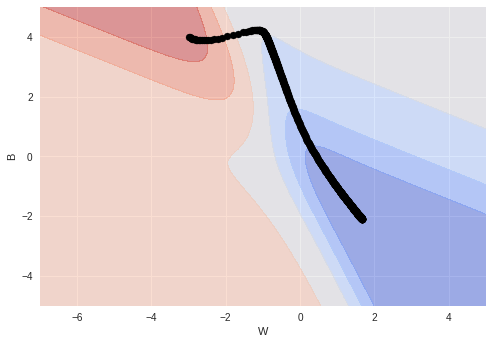

In [ ]:
my_cmap = LinearSegmentedColormap.from_list("",['red','white','blue'])
w_min = -7
w_max = 5

b_min = -5
b_max = 5

x1 = np.linspace(w_min,w_max,100)
x2 = np.linspace(b_min,b_max,100)

WW,BB = np.meshgrid(x1,x2)
error = sn.error(X,Y,W=WW,B=BB)
plt.contourf(WW,BB,error,cmap=cm.coolwarm,alpha=0.5)
plt.scatter(sn.w_h,sn.b_h,marker='o',color='black')
plt.xlabel('W')
plt.ylabel('B')
plt.show()

## 3. Plotting 3D contour plot

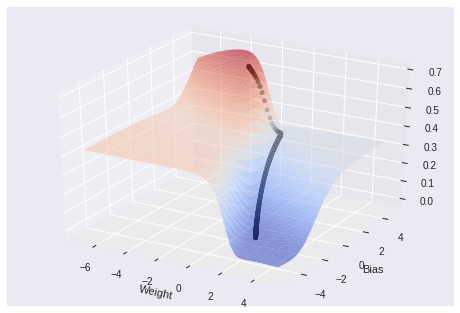

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(WW,BB,error,cmap=cm.coolwarm,alpha=0.6)
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.scatter(sn.w_h,sn.b_h,list(sn.error_h.values()),marker='o',color='black')

## 4. Animation of plots

In [ ]:
# converting the history into numpy array for easy plotting and animation
weights = np.array(sn.w_h)
biases = np.array(sn.b_h)
errors = np.array(list(sn.error_h.values()))

Text(0, 0.5, 'B')

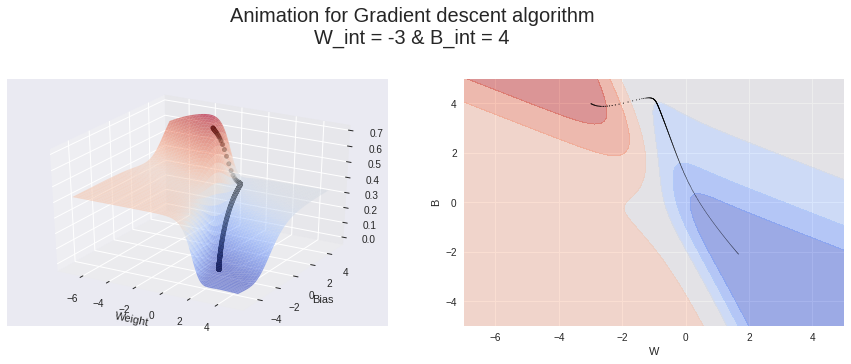

In [ ]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Animation for Gradient descent algorithm\nW_int = -3 & B_int = 4',fontsize=20)
# Animation of 3D surface plot
ax1 = plt.subplot(221,projection='3d')
ax1.plot_surface(WW,BB,error,cmap=cm.coolwarm,alpha=0.6)
ax1.set_xlabel('Weight')
ax1.set_ylabel('Bias')
ax1.scatter(sn.w_h,sn.b_h,list(sn.error_h.values()),marker='o',color='black')

# Animation of the 2D contour plot
ax2 = plt.subplot(2,2,2)
ax2.contourf(WW,BB,error,cmap=cm.coolwarm,alpha=0.5)
ax2.scatter(sn.w_h,sn.b_h,list(sn.error_h.values()),marker='o',color='black')
ax2.set_xlabel('W')
ax2.set_ylabel('B')

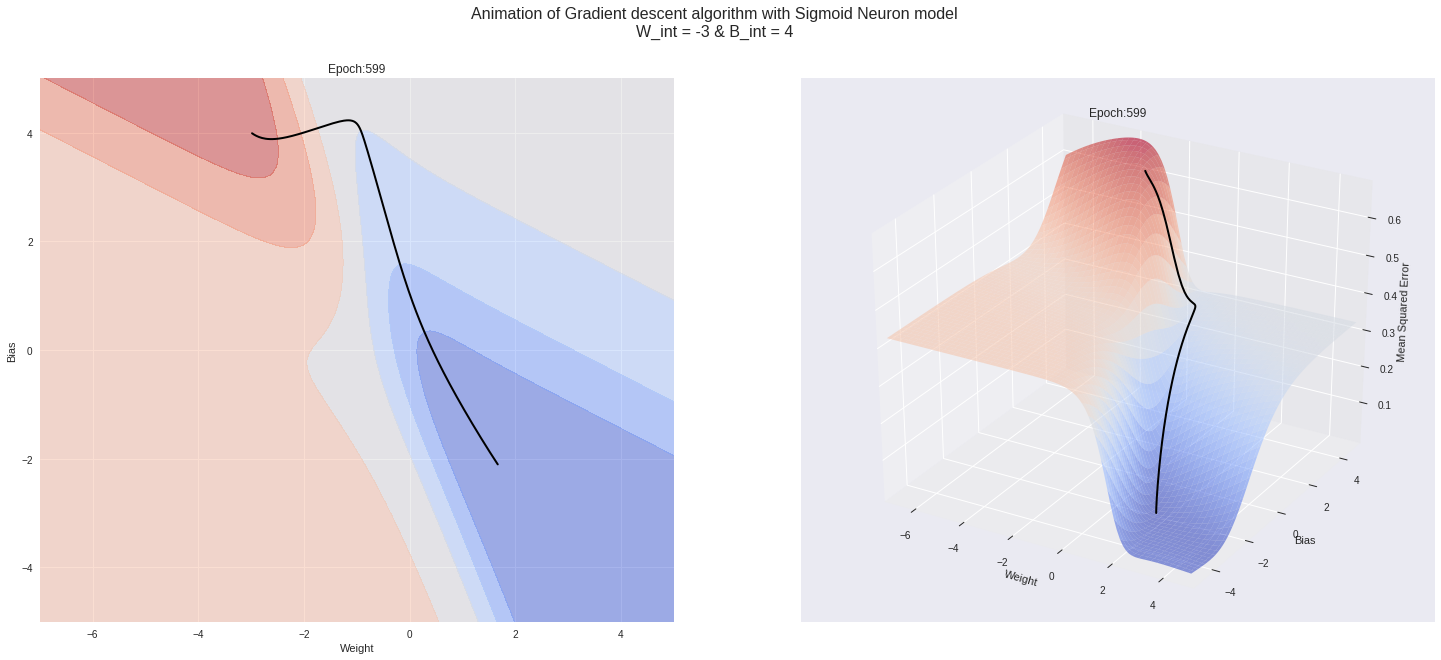

In [ ]:
fig = plt.figure(figsize=(25,10))
fig.suptitle('Animation of Gradient descent algorithm with Sigmoid Neuron model\nW_int = -3 & B_int = 4',fontsize=16)
ax1 = plt.subplot(121,xlim=(-7,5), ylim=(-5,5))
ax2 = plt.subplot(122,xlim=(-7,5), ylim=(-5,5),projection='3d')

frames,interval = epochs,30

ax1.contourf(WW,BB,error,cmap=cm.coolwarm,alpha=0.5)
ax1.set_xlabel('Weight')
ax1.set_ylabel('Bias')

ax2.plot_surface(WW,BB,error,cmap=cm.coolwarm,alpha=0.6)
ax2.set_xlabel('Weight')
ax2.set_ylabel('Bias')
ax2.set_zlabel('Mean Squared Error')

line1, = ax1.plot([], [], lw=2,color='black')
line2, = ax2.plot([],[],lw=2,color='black')

title1 = ax1.set_title('Epoch: ')
title2 = ax2.set_title('Epoch: ')
# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    line2.set_data([],[])
    return line1,line2

# animation function.  This is called sequentially

# It takes a single parameter, the frame number i,
# and draws a desired plot with a shift that depends on i
def animate(i):
    x = weights[0:i+1]
    y = biases[0:i+1]
    z = errors[0:i+1]

    line1.set_data(x,y)
    title1.set_text('Epoch:'+str(i*epochs//frames))

    line2.set_data(x,y)
    line2.set_3d_properties(z)
    title2.set_text('Epoch:'+str(i*epochs//frames))

    return line1,line2

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                                 frames=frames, interval=interval, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html

anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

HTML(anim.to_html5_video())